# Model Based Machine Learning Project

We have chosen to work with a dataset on Life Expectancy collected by (WHO).

In the first part of this script we do some data cleaning/preperation and initial statistical analysis. 

## Loadning and visualizing the data 
We start by importing packages.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib as mplib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data/Life Expectancy Data.csv")
LED = pd.DataFrame(data)

In [ ]:
LED.head(5)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Replace 'developed' with 1 and 'developing' with 0
LED['Status'] = LED['Status'].map({'Developed': 1, 'Developing': 0})
# Convert the column to integer type
LED['Status'] = LED['Status'].astype(int)

LED.head(5)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
print(LED.info())
#print(data_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   int64  
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

array([[<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Lifeexpectancy'}>,
        <Axes: title={'center': 'AdultMortality'}>],
       [<Axes: title={'center': 'infantdeaths'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentageexpenditure'}>],
       [<Axes: title={'center': 'HepatitisB'}>,
        <Axes: title={'center': 'Measles'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'under-fivedeaths'}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Totalexpenditure'}>],
       [<Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'thinness1-19years'}>,
        <Axes: title={'center': 'thinness5-9years'}>],
       [<Axes: title={'center': 'Incomecompositionofresources'}>,
        <Axes: title={'center': 'Schooling'}>, <A

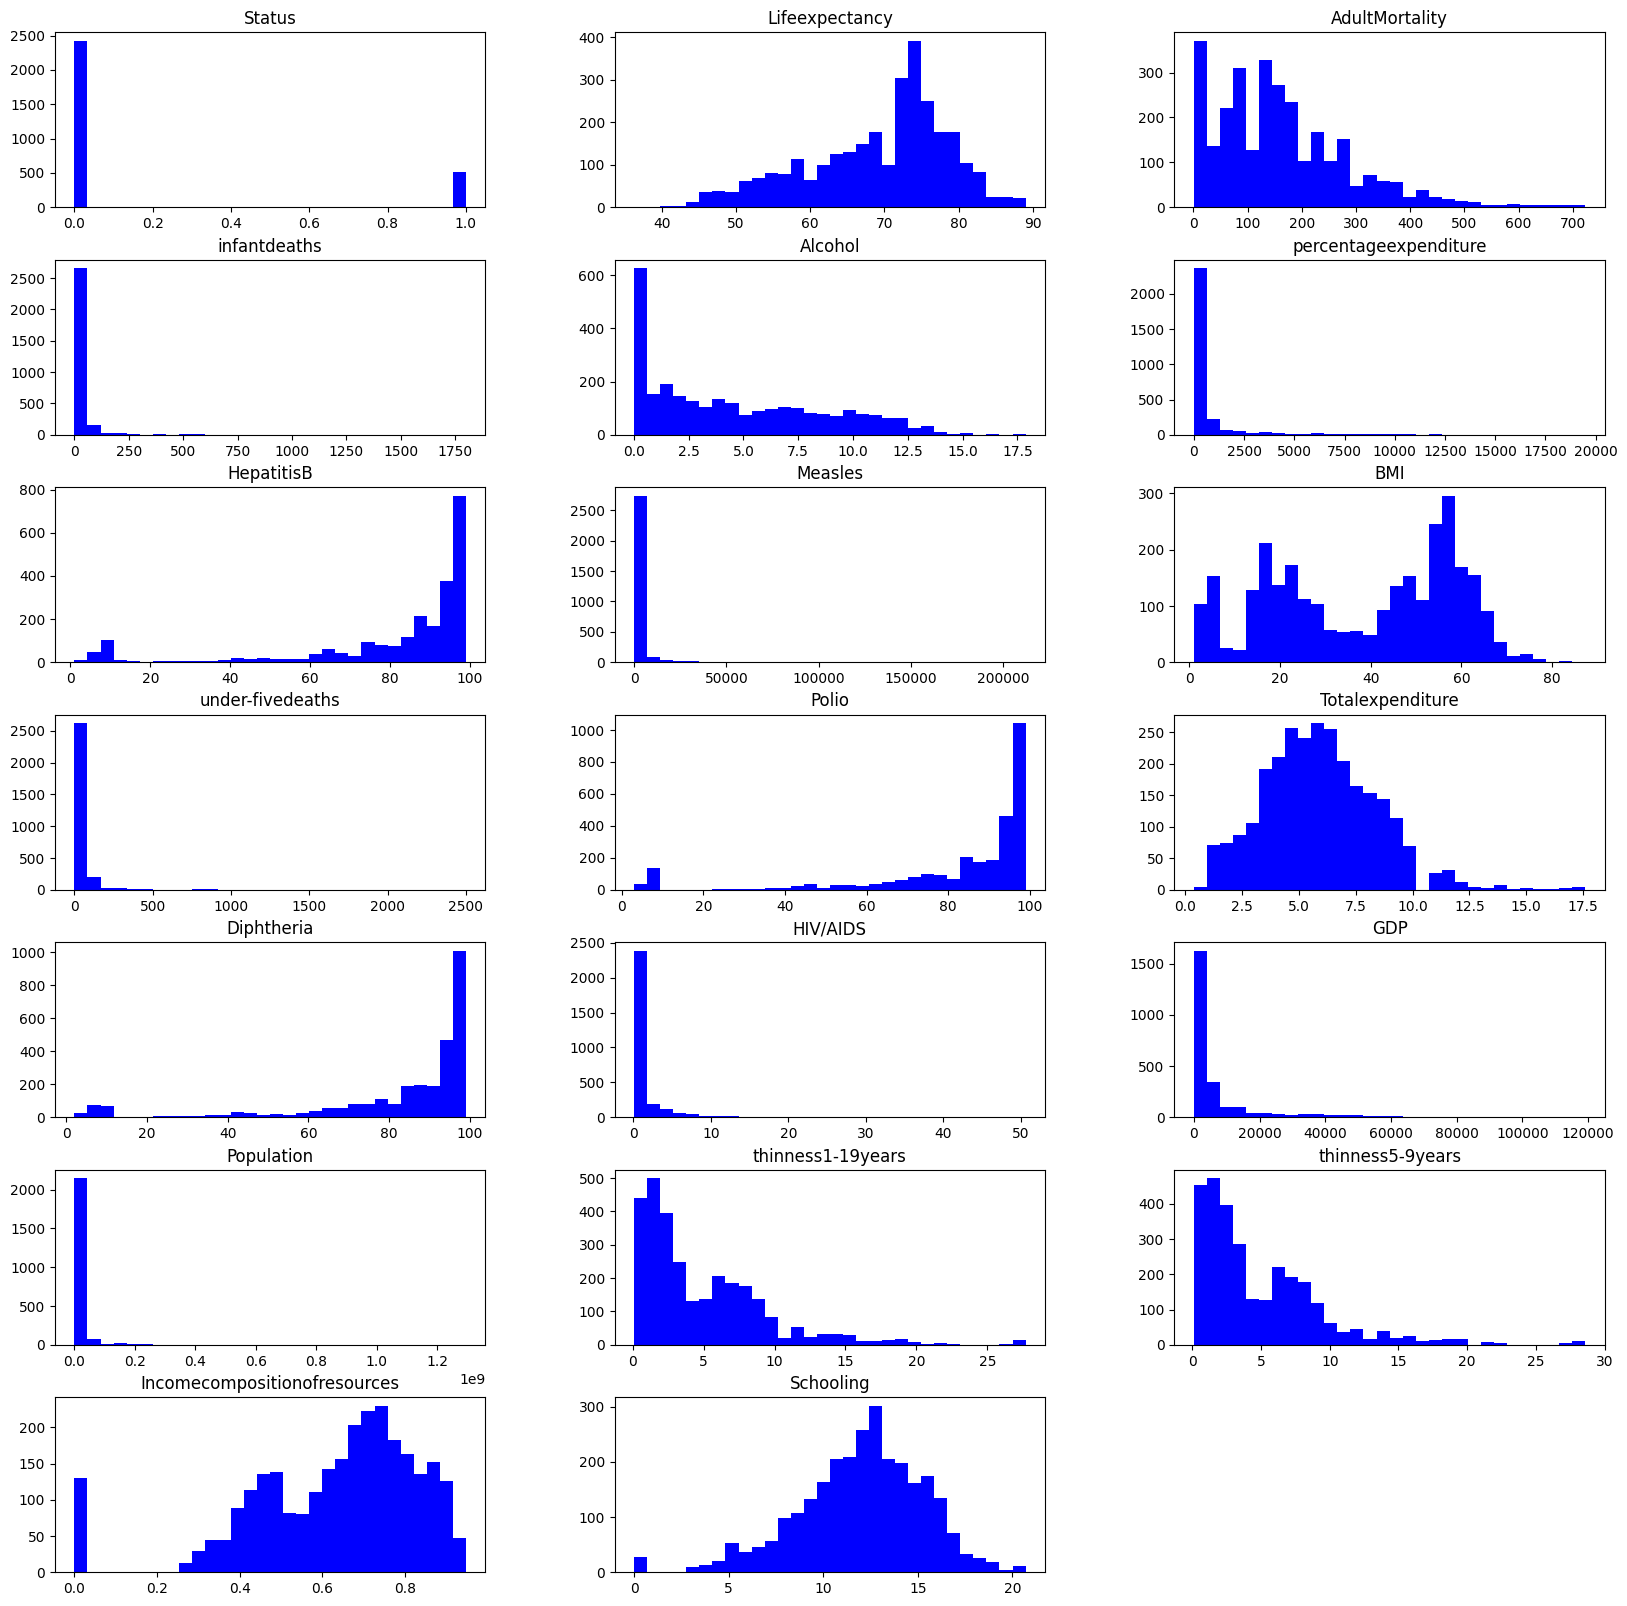

In [ ]:
#Plotting histograms of all data.

# Select only numerical columns
num_cols = LED.select_dtypes(include=['int64', 'float64']).drop('Year', axis=1)

# Plot histograms for all numerical columns in a grid
num_cols.hist(figsize=(20,20), bins=30, grid=False, layout=(7,3), color='b')

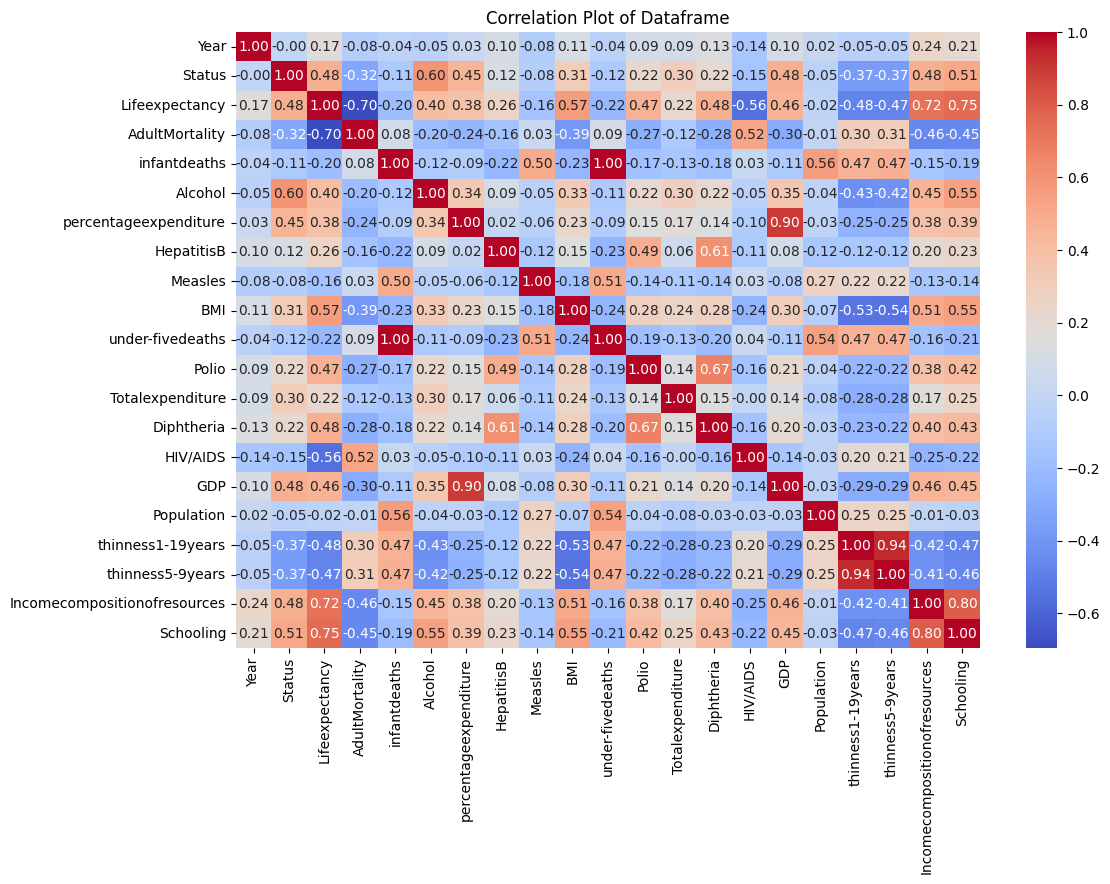

In [ ]:
# Compute the correlation matrix
corr_matrix = LED.corr()

plt.figure(figsize=(12, 8))

# Plot the correlation matrix using seaborn heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Plot of Dataframe')
plt.show()

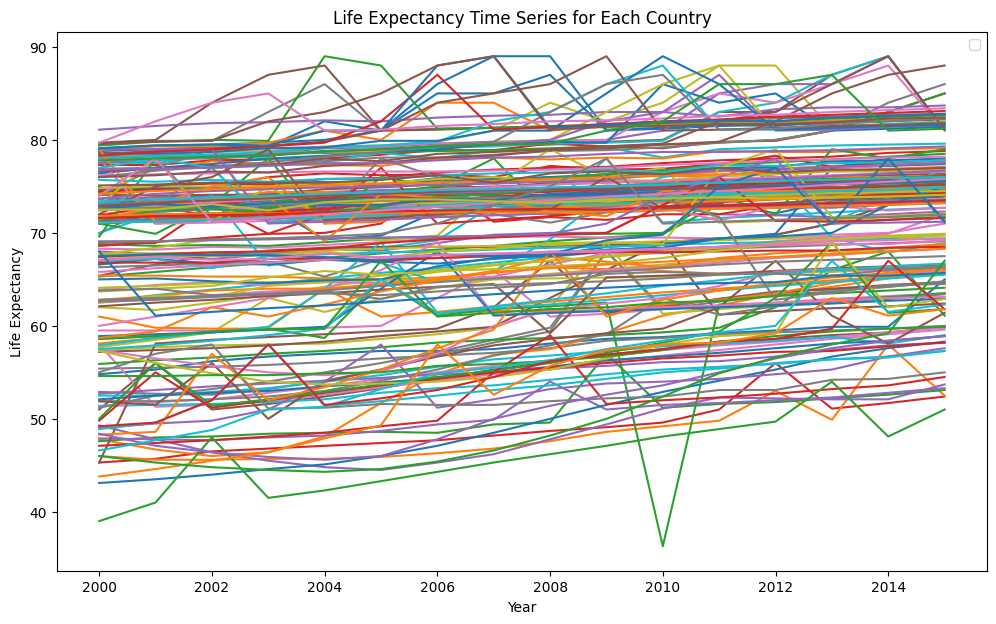

In [ ]:
# Group the data by country
grouped = LED.groupby('Country')

# Set the size of the plot
plt.figure(figsize=(12,7))

# Plot the time series for each country
for country, group in grouped:
    plt.plot(group['Year'], group['Lifeexpectancy'])

# Add legend to the plot
plt.legend()

# Set axis labels and title of the plot
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Time Series for Each Country')

plt.show()

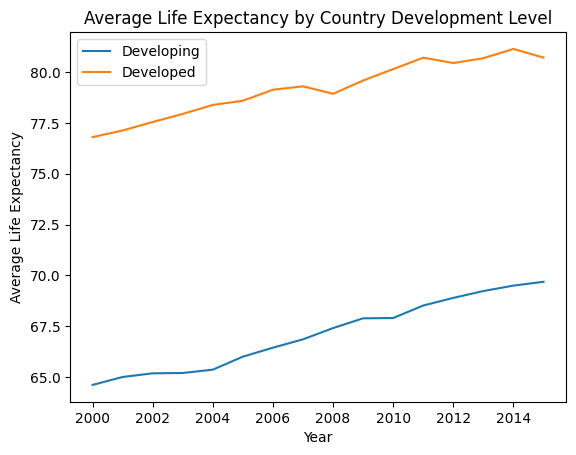

In [ ]:
# Group by 'Status' and 'year', and take the average of 'life_expectancy'
LED_grouped = LED.groupby(['Status', 'Year'])['Lifeexpectancy'].mean()

# Convert the grouped dataframe to a wide format with 'year' as the index
LED_pivot = LED_grouped.unstack(level=0)

# Plot the resulting dataframe as a time series
LED_pivot.plot(kind='line')

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Country Development Level')
# Add legend to the plot
plt.legend(labels=['Developing','Developed'])

# Show the plot
plt.show()


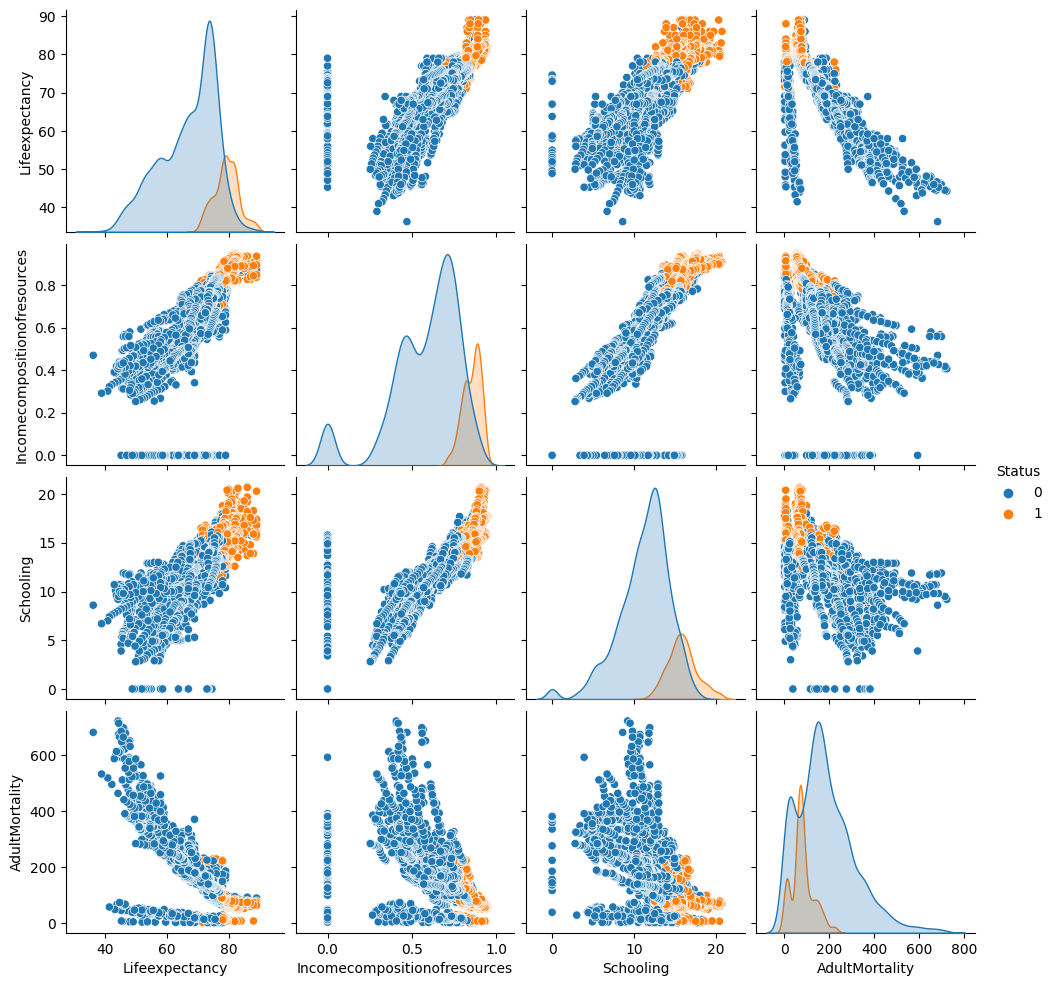

In [ ]:
# Select columns to plot
groups_to_plot = ['Lifeexpectancy','Incomecompositionofresources','Schooling','AdultMortality']  
# Create scatter plot matrix
sns.pairplot(LED,vars = groups_to_plot, hue ='Status',)

# Ny sektion